In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

In [244]:
#read in most updated tweets from elon musk, filtered using keywords such as tesla
elon = pd.read_csv("../../data/twitter/elon_main_2019_05_07_jing.csv")
elon.head(30)

,Unnamed: 0,Datetime,retweets,favorites,text,id,emoji,isreply,replyto,origin
0,5,2019-04-14 22:54:00+00:00,131,5201,that tweet did take immense effort fair point ...,1117561885040283648,🤣 🤣,True,EforElectric,1.117554e+18
1,17,2019-04-14 20:07:00+00:00,202,1931,i’ve always thought that the fundamental good ...,1117519699930013696,NaN,True,martinengwicht,1.116887e+18
2,19,2019-04-14 20:00:00+00:00,269,2337,"i’m sorry, fred, but wsj has relentlessly atta...",1117518012926402560,NaN,True,FredericLambert,1.117510e+18
3,24,2019-04-14 19:28:00+00:00,125,955,very much so. there are 2.5b cars & trucks on ...,1117509874831609856,NaN,True,KnightmarArchon,1.116887e+18
4,25,2019-04-14 19:19:00+00:00,170,2470,sentry mode fundamentally empowers the individ...,1117507646804807681,NaN,True,elonmusk,1.117443e+18
5,31,2019-04-14 08:42:00+00:00,95,1185,"there is 35 gwh/yr “theoretical capacity”, but...",1117347290585243648,NaN,True,tsrandall,1.116352e+18
6,33,2019-04-13 19:59:00+00:00,17,380,"yes, all cars with autopilot 2.0 or higher, so...",1117155252795346944,NaN,True,GregMatson,1.117117e+18
7,39,2019-04-13 19:17:00+00:00,424,6190,incorrect. pana cell lines at giga are only at...,1117144865299501056,NaN,True,tsrandall,1.116352e+18
8,40,2019-04-13 17:33:00+00:00,63,916,tesla will start fsd computer upgrade in a few...,1117118581865476096,NaN,True,kneibert,1.117117e+18
9,43,2019-04-13 17:26:00+00:00,2129,42658,please note that the price of the tesla full s...,1117116982778679297,NaN,False,NaN,1.117117e+18


In [226]:
type(elon["Datetime"])

pandas.core.series.Series

In [245]:
#obtaining "Datetime", year, month, day, date and day of week columns 
elon["Datetime"]=pd.to_datetime(elon["Datetime"],utc=False)


elon['year']= elon['Datetime'].dt.year
elon['month']=elon['Datetime'].dt.month
elon['day']=elon['Datetime'].dt.day
elon['date']=elon['Datetime'].dt.date
elon['DayofWeek']=elon['Datetime'].dt.weekday



In [246]:
elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 15 columns):
Unnamed: 0    1077 non-null int64
Datetime      1077 non-null datetime64[ns, UTC]
retweets      1077 non-null int64
favorites     1077 non-null int64
text          1077 non-null object
id            1077 non-null object
emoji         23 non-null object
isreply       1072 non-null object
replyto       529 non-null object
origin        1072 non-null float64
year          1077 non-null int64
month         1077 non-null int64
day           1077 non-null int64
date          1077 non-null object
DayofWeek     1077 non-null int64
dtypes: datetime64[ns, UTC](1), float64(1), int64(7), object(6)
memory usage: 126.3+ KB


In [248]:
#created "weekend" for whether a tweet was published during the weekend
elon["Weekend"] = elon["DayofWeek"]>=5

In [250]:
elon.head(20)

,Unnamed: 0,Datetime,retweets,favorites,text,id,emoji,isreply,replyto,origin,year,month,day,date,DayofWeek,Weekend
0,5,2019-04-14 22:54:00+00:00,131,5201,that tweet did take immense effort fair point ...,1117561885040283648,🤣 🤣,True,EforElectric,1.117554e+18,2019,4,14,2019-04-14,6,True
1,17,2019-04-14 20:07:00+00:00,202,1931,i’ve always thought that the fundamental good ...,1117519699930013696,NaN,True,martinengwicht,1.116887e+18,2019,4,14,2019-04-14,6,True
2,19,2019-04-14 20:00:00+00:00,269,2337,"i’m sorry, fred, but wsj has relentlessly atta...",1117518012926402560,NaN,True,FredericLambert,1.117510e+18,2019,4,14,2019-04-14,6,True
3,24,2019-04-14 19:28:00+00:00,125,955,very much so. there are 2.5b cars & trucks on ...,1117509874831609856,NaN,True,KnightmarArchon,1.116887e+18,2019,4,14,2019-04-14,6,True
4,25,2019-04-14 19:19:00+00:00,170,2470,sentry mode fundamentally empowers the individ...,1117507646804807681,NaN,True,elonmusk,1.117443e+18,2019,4,14,2019-04-14,6,True
5,31,2019-04-14 08:42:00+00:00,95,1185,"there is 35 gwh/yr “theoretical capacity”, but...",1117347290585243648,NaN,True,tsrandall,1.116352e+18,2019,4,14,2019-04-14,6,True
6,33,2019-04-13 19:59:00+00:00,17,380,"yes, all cars with autopilot 2.0 or higher, so...",1117155252795346944,NaN,True,GregMatson,1.117117e+18,2019,4,13,2019-04-13,5,True
7,39,2019-04-13 19:17:00+00:00,424,6190,incorrect. pana cell lines at giga are only at...,1117144865299501056,NaN,True,tsrandall,1.116352e+18,2019,4,13,2019-04-13,5,True
8,40,2019-04-13 17:33:00+00:00,63,916,tesla will start fsd computer upgrade in a few...,1117118581865476096,NaN,True,kneibert,1.117117e+18,2019,4,13,2019-04-13,5,True
9,43,2019-04-13 17:26:00+00:00,2129,42658,please note that the price of the tesla full s...,1117116982778679297,NaN,False,NaN,1.117117e+18,2019,4,13,2019-04-13,5,True


In [252]:
#obtained time column
elon['Time']=elon['Datetime'].dt.time

In [253]:
elon.head()


,Unnamed: 0,Datetime,retweets,favorites,text,id,emoji,isreply,replyto,origin,year,month,day,date,DayofWeek,Weekend,Time
0,5,2019-04-14 22:54:00+00:00,131,5201,that tweet did take immense effort fair point ...,1117561885040283648,🤣 🤣,True,EforElectric,1.117554e+18,2019,4,14,2019-04-14,6,True,22:54:00
1,17,2019-04-14 20:07:00+00:00,202,1931,i’ve always thought that the fundamental good ...,1117519699930013696,NaN,True,martinengwicht,1.116887e+18,2019,4,14,2019-04-14,6,True,20:07:00
2,19,2019-04-14 20:00:00+00:00,269,2337,"i’m sorry, fred, but wsj has relentlessly atta...",1117518012926402560,NaN,True,FredericLambert,1.117510e+18,2019,4,14,2019-04-14,6,True,20:00:00
3,24,2019-04-14 19:28:00+00:00,125,955,very much so. there are 2.5b cars & trucks on ...,1117509874831609856,NaN,True,KnightmarArchon,1.116887e+18,2019,4,14,2019-04-14,6,True,19:28:00
4,25,2019-04-14 19:19:00+00:00,170,2470,sentry mode fundamentally empowers the individ...,1117507646804807681,NaN,True,elonmusk,1.117443e+18,2019,4,14,2019-04-14,6,True,19:19:00


In [254]:
#stock market opens from 13:30 to 20:00 in Universal Time
day_start="13:30:00"
day_end="20:00:00"

format_str = '%H:%M:%S' 
start = dt.datetime.strptime(day_start, format_str)
end = dt.datetime.strptime(day_end, format_str)
start_time=dt.datetime.strptime(day_start, '%H:%M:%S').time()
end_time=dt.datetime.strptime(day_end, '%H:%M:%S').time()



In [255]:
#create "BinaryTrading" column, where 1 indicates tweet was published during trading hours, 0 otherwise
elon["BinaryTrading"]=elon["year"]
for i in range(772):
    if elon["Weekend"][i]==1:
        elon["BinaryTrading"][i]=0
    elif (elon["Time"][i]<=end_time and elon["Time"][i]>=start_time):
        elon["BinaryTrading"][i]=1
    else:
        elon["BinaryTrading"][i]=0

/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [256]:
elon.head(20)

,Unnamed: 0,Datetime,retweets,favorites,text,id,emoji,isreply,replyto,origin,year,month,day,date,DayofWeek,Weekend,Time,BinaryTrading
0,5,2019-04-14 22:54:00+00:00,131,5201,that tweet did take immense effort fair point ...,1117561885040283648,🤣 🤣,True,EforElectric,1.117554e+18,2019,4,14,2019-04-14,6,True,22:54:00,0
1,17,2019-04-14 20:07:00+00:00,202,1931,i’ve always thought that the fundamental good ...,1117519699930013696,NaN,True,martinengwicht,1.116887e+18,2019,4,14,2019-04-14,6,True,20:07:00,0
2,19,2019-04-14 20:00:00+00:00,269,2337,"i’m sorry, fred, but wsj has relentlessly atta...",1117518012926402560,NaN,True,FredericLambert,1.117510e+18,2019,4,14,2019-04-14,6,True,20:00:00,0
3,24,2019-04-14 19:28:00+00:00,125,955,very much so. there are 2.5b cars & trucks on ...,1117509874831609856,NaN,True,KnightmarArchon,1.116887e+18,2019,4,14,2019-04-14,6,True,19:28:00,0
4,25,2019-04-14 19:19:00+00:00,170,2470,sentry mode fundamentally empowers the individ...,1117507646804807681,NaN,True,elonmusk,1.117443e+18,2019,4,14,2019-04-14,6,True,19:19:00,0
5,31,2019-04-14 08:42:00+00:00,95,1185,"there is 35 gwh/yr “theoretical capacity”, but...",1117347290585243648,NaN,True,tsrandall,1.116352e+18,2019,4,14,2019-04-14,6,True,08:42:00,0
6,33,2019-04-13 19:59:00+00:00,17,380,"yes, all cars with autopilot 2.0 or higher, so...",1117155252795346944,NaN,True,GregMatson,1.117117e+18,2019,4,13,2019-04-13,5,True,19:59:00,0
7,39,2019-04-13 19:17:00+00:00,424,6190,incorrect. pana cell lines at giga are only at...,1117144865299501056,NaN,True,tsrandall,1.116352e+18,2019,4,13,2019-04-13,5,True,19:17:00,0
8,40,2019-04-13 17:33:00+00:00,63,916,tesla will start fsd computer upgrade in a few...,1117118581865476096,NaN,True,kneibert,1.117117e+18,2019,4,13,2019-04-13,5,True,17:33:00,0
9,43,2019-04-13 17:26:00+00:00,2129,42658,please note that the price of the tesla full s...,1117116982778679297,NaN,False,NaN,1.117117e+18,2019,4,13,2019-04-13,5,True,17:26:00,0


In [257]:
#created "DayDistance" for number of days between the tweet published and when the stock market opens
elon["DayDistance"]=elon["year"]
for i in range(772):
    if elon["BinaryTrading"][i]==1:
        elon["DayDistance"][i]=0
    elif (elon["DayofWeek"][i]==4 and elon["BinaryTrading"][i]==0 and elon["Time"][i]>end_time):
        elon["DayDistance"][i]=3
    elif elon["DayofWeek"][i]==5:
        elon["DayDistance"][i]=2
    elif elon["DayofWeek"][i]==6:
        elon["DayDistance"][i]=1
    elif (elon["BinaryTrading"][i]==0 and elon["Time"][i]<start_time):
        elon["DayDistance"][i]=0
    else:
        elon["DayDistance"][i]=1

/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/jet/var/python/lib/python3.6/site-packages/ipykernel_lau

In [258]:
elon.head(20)

,Unnamed: 0,Datetime,retweets,favorites,text,id,emoji,isreply,replyto,origin,year,month,day,date,DayofWeek,Weekend,Time,BinaryTrading,DayDistance
0,5,2019-04-14 22:54:00+00:00,131,5201,that tweet did take immense effort fair point ...,1117561885040283648,🤣 🤣,True,EforElectric,1.117554e+18,2019,4,14,2019-04-14,6,True,22:54:00,0,1
1,17,2019-04-14 20:07:00+00:00,202,1931,i’ve always thought that the fundamental good ...,1117519699930013696,NaN,True,martinengwicht,1.116887e+18,2019,4,14,2019-04-14,6,True,20:07:00,0,1
2,19,2019-04-14 20:00:00+00:00,269,2337,"i’m sorry, fred, but wsj has relentlessly atta...",1117518012926402560,NaN,True,FredericLambert,1.117510e+18,2019,4,14,2019-04-14,6,True,20:00:00,0,1
3,24,2019-04-14 19:28:00+00:00,125,955,very much so. there are 2.5b cars & trucks on ...,1117509874831609856,NaN,True,KnightmarArchon,1.116887e+18,2019,4,14,2019-04-14,6,True,19:28:00,0,1
4,25,2019-04-14 19:19:00+00:00,170,2470,sentry mode fundamentally empowers the individ...,1117507646804807681,NaN,True,elonmusk,1.117443e+18,2019,4,14,2019-04-14,6,True,19:19:00,0,1
5,31,2019-04-14 08:42:00+00:00,95,1185,"there is 35 gwh/yr “theoretical capacity”, but...",1117347290585243648,NaN,True,tsrandall,1.116352e+18,2019,4,14,2019-04-14,6,True,08:42:00,0,1
6,33,2019-04-13 19:59:00+00:00,17,380,"yes, all cars with autopilot 2.0 or higher, so...",1117155252795346944,NaN,True,GregMatson,1.117117e+18,2019,4,13,2019-04-13,5,True,19:59:00,0,2
7,39,2019-04-13 19:17:00+00:00,424,6190,incorrect. pana cell lines at giga are only at...,1117144865299501056,NaN,True,tsrandall,1.116352e+18,2019,4,13,2019-04-13,5,True,19:17:00,0,2
8,40,2019-04-13 17:33:00+00:00,63,916,tesla will start fsd computer upgrade in a few...,1117118581865476096,NaN,True,kneibert,1.117117e+18,2019,4,13,2019-04-13,5,True,17:33:00,0,2
9,43,2019-04-13 17:26:00+00:00,2129,42658,please note that the price of the tesla full s...,1117116982778679297,NaN,False,NaN,1.117117e+18,2019,4,13,2019-04-13,5,True,17:26:00,0,2


In [259]:
#export elon with new features into pickle file 
import pickle
with open('../../data/features/2019_05_07_Datetime_Jeff.pickle','wb') as handle: 
    pickle.dump(elon, handle,protocol=pickle.HIGHEST_PROTOCOL)

# Plotting Distribution of Tweets according to hour of day

In [260]:
elon["Hour"]=elon["Datetime"].dt.hour
elon["Hour"].head()

0    22
1    20
2    20
3    19
4    19
Name: Hour, dtype: int64

In [261]:
#trying to find hourly distribution of elon's tweets
elon.groupby(["Hour"]).count().iloc[:,1]

Hour
0     45
1     64
2     53
3     37
4     38
5     34
6     35
7     36
8     21
9     22
10    15
11     5
12    11
13     9
14    36
15    44
16    46
17    74
18    79
19    95
20    83
21    60
22    80
23    55
Name: Datetime, dtype: int64

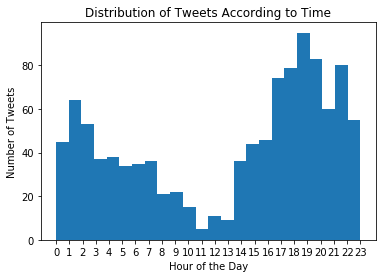

In [262]:

plt.hist(elon["Hour"],bins=24)

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Tweets")
plt.title("Distribution of Tweets According to Time")

plt.xticks(np.arange(min(elon["Hour"]), max(elon["Hour"])+1, 1.0))

plt.show()
